# 0. Pandas 

Pandas library: 데이터를 수집하고 정리하는 데 최적화된 도구들을 모아놓음
<br>
<br>
분석을 위해 다양한 소스(source)로부터 수집하는 데이터는 형태나 속성이 매우 다양하다. 특히 서로 다른 형식을 갖는 여러 종류의 데이터를 컴퓨터가 이해할 수 있도록 동일한 형식을 갖는 구조로 통합할 필요가 있다.
<br>
이를 위해 판다스는 시리즈(Series)와 데이터프레임(DataFrame)이라는 구조화된 데이터 형식을 제공한다.

# 1. Series 
- index label, value, column name으로 구성
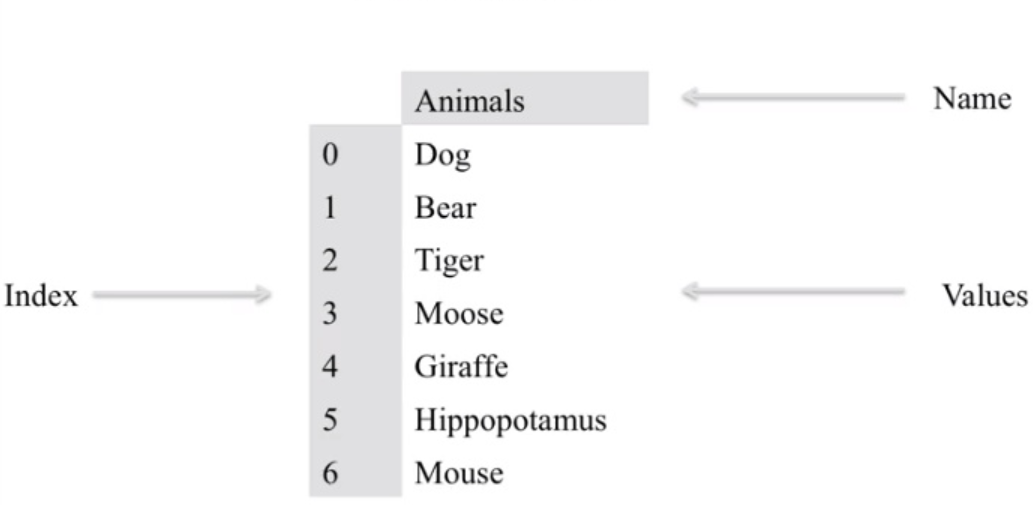
<br>
(출처:https://engkimbs.tistory.com/672)

#### 1. 리스트(List)로 시리즈 만들기

In [4]:
import pandas as pd

In [11]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [12]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

#### 2. missing data 다루는 방법
- 문자열 리스트에 None이 포함 → None
- 숫자 리스트에 None이 포함 → NaN (not a number)

In [13]:
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [14]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

- NaN은 None과 비슷한 의미를 가지고 있지만 숫자가 아니다

In [1]:
import numpy as np

np.nan == None #nan과 None은 같지 않다 

False

- `NaN` has the property that it doesn't equal itself, you should use `np.isnan` to test NaN values

In [2]:
np.nan == np.nan

False

In [3]:
np.isnan(np.nan) #the Numpy library is NaN.

True

#### 3. 사전(Dictionary)으로 시리즈 만들기
- index label: 사전의 key
- value: 사전의 value

In [18]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

- 임의의 값을 index label로 설정하기: index=[  ]

In [11]:
s = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
s

India      Tiger
America     Bear
Canada     Moose
dtype: object

- 사전의 key의 개수 ≠ index list의 데이터 수 
<br>
   1. index list에만 있는 값: 그 index에 대한 값이 None or NaN
<br>
   2. 사전에만 있는 값: 무시 

In [6]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}

s = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
s

Golf      Scotland
Sumo         Japan
Hockey         NaN
dtype: object

# 2. Querying a Series

### 1. 시리즈의 value 찾아내는 방법
- iloc : index로 찾기
- loc : index label으로 찾기 

In [20]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [5]:
s.iloc[3] #시리즈의 4번째 행의 value 도출

'South Korea'

In [14]:
s.loc['Golf'] #시리즈의 'Golf' 행의 value 도출

'Scotland'

- iloc, loc을 따로 쓰지 않아도 [integer]은 iloc , [object]은 loc을 사용한 것처럼 결과값을 도출함
- 그러나 index label 자체가 정수일 경우 loc와 iloc 중 무엇을 사용해야할 지 판단하지 못함 → iloc/loc을 사용해야함.

In [15]:
s[3]

'South Korea'

In [16]:
s['Golf']

'Scotland'

In [6]:
sports = {99: 'Bhutan',
          100: 'Scotland',
          101: 'Japan',
          102: 'South Korea'}
s = pd.Series(sports)
s

99          Bhutan
100       Scotland
101          Japan
102    South Korea
dtype: object

In [7]:
s[0] 

KeyError: 0

### 2. 시리즈의 value 다루기
#### (1)  vectorization
- the process of converting an algorithm from operating on a single value at a time to operating on a set of values at one time
- e.g., np.sum
- 처리 속도가 빠름

In [9]:
import numpy as np
import pandas as pd

s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [9]:
total = 0
for item in s:
    total+=item
print(total)

324.0


In [7]:
total = np.sum(s)
print(total)

324.0


#### (2) broadcasting
- apply an operation to every value in series
- 처리 속도가 빠르고, 코드를 읽기 쉬움

In [10]:
for label, value in s.iteritems():
    s.set_value(label, value+2)
s.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0    102.0
1    122.0
2    103.0
3      5.0
dtype: float64

In [16]:
#adds two to each item in s using broadcasting

s+=2 
s.head()

0    102.0
1    122.0
2    103.0
3      5.0
dtype: float64

#### (3) loc를 이용하여 시리즈의 데이터 수정 / 새로운 데이터 추가

In [11]:
s = pd.Series([1, 2, 3])
print(s)

0    1
1    2
2    3
dtype: int64


In [13]:
#데이터 수정
s.loc[2] = 5 
s

0    1
1    2
2    5
dtype: int64

In [14]:
#새로운 데이터 추가

s.loc['Animal'] = 'Bears'
s

0             1
1             2
2             5
Animal    Bears
dtype: object

#### (4) append 함수를 이용하여 시리즈 합치기 

In [8]:
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})
cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                   index=['Cricket',
                                          'Cricket',
                                          'Cricket',
                                          'Cricket'])

all_countries = original_sports.append(cricket_loving_countries)

In [14]:
all_countries

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object

In [9]:
#합치기전의 series는 변하지 않는다

original_sports 

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [16]:
# index label이 유일하지 않을때 loc의 결과값으로 시리즈를 반환

all_countries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

# 3. DataFrame 
- 이차원의 시리즈
- distinction between column and row is only conceptual 

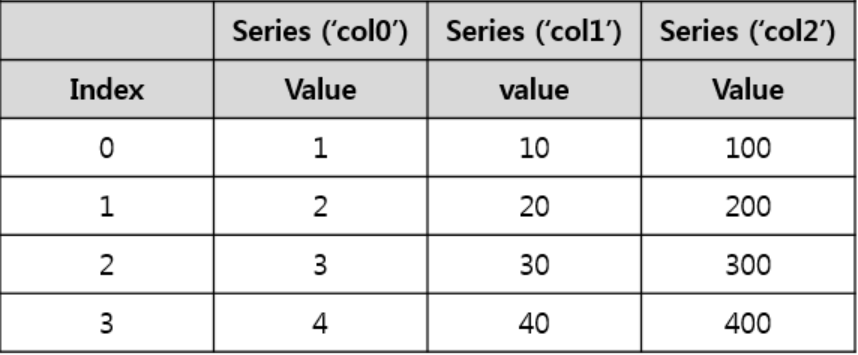

(출처: https://wikidocs.net/4367)

In [6]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


### 1. iloc[row index] / loc[row index label] 을 통해 데이터프레임의 값 찾기

#### (1) iloc/loc[single value]
- index/index label이 유일할때: 시리즈를 반환
- index/index label이 유일하지 않을때: 데이터프레임을 반환

In [18]:
df.loc['Store 2']

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
Name: Store 2, dtype: object

In [34]:
df.loc['Store 1']

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5


#### (2) 행과 열을 모두 이용해서 데이터 찾기: loc[index label, column name]

In [35]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

### 2. Column name을 이용해서 데이터 찾기

#### (1) Transpose → loc 사용

In [37]:
df.T
df.T.loc['Cost']

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

#### (2) [column name]

In [11]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

### 3. Chaning
- chaining indexing together
- return copy of dataframe instead of view → 처리 속도가 느려짐

In [40]:
df.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

### 4. Slicing 

In [41]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


### 5. 데이터 지우기

#### (1) drop 함수 이용
- 기존 데이터프레임을 바꾸지 않고, 지정한 행을 없앤 복사본을 반환
- two optional parameters가 존재함
 1. inplace: true → 복사본을 출력하지 않고 원본을 변경
 2. axis: 0으로 설정되어있을 경우 행을 없앰, 1으로 설정되어있을 경우 열을 없앰

In [8]:
df.drop('Store 1')

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [7]:
df #기존 데이터프레임은 바뀌지 않음 

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


#### (2) del 이용: 기존 데이터프레임에서 데이터를 삭제함 (원본이 바뀜)

In [9]:
copy_df = df.drop('Store 1')

del copy_df['Name']
copy_df

,Item Purchased,Cost
Store 2,Bird Seed,5.0


### 6. 새로운 열 추가하기
#### 1. 데이터프레임이름[column name] : 단일값(scalar value)
- 모든 행에 단일값이 저장됨

In [8]:
df['Location'] = None
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


#### 2. 각 행에 서로 다른 값을 가진 새로운 열을 추가하기
- 기존 데이터프레임 길이의 개수만큼 값들을 차례대로 입력
- 길이를 맞추기 위해서 None를 입력해야될 때도 있음 

In [9]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Location,Date
Store 1,Chris,Dog Food,22.5,None,December 1
Store 1,Kevyn,Kitty Litter,2.5,None,January 1
Store 2,Vinod,Bird Seed,5.0,None,mid-May


In [10]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Location,Date,Feedback
Store 1,Chris,Dog Food,22.5,None,December 1,Positive
Store 1,Kevyn,Kitty Litter,2.5,None,January 1,None
Store 2,Vinod,Bird Seed,5.0,None,mid-May,Negative


#### 3. New column identifier을 이용하여 새로운 열 추가하기
- index label이 중복되지 않을 경우에 사용 가능
- 데이터프레임이름[column name] = pd.Series({index : value})

In [11]:
adf = df.reset_index() # index 값을 0,1,2로 설정

adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'}) #Date라는 열에 각 인덱스에 대한 value 입력
adf

,index,Name,Item Purchased,Cost,Location,Date,Feedback
0,Store 1,Chris,Dog Food,22.5,None,December 1,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,None,NaN,None
2,Store 2,Vinod,Bird Seed,5.0,None,mid-May,Negative


### 7. 데이터프레임 합치기
#### 1. Union (합집합)

In [25]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


- pd.merge(how='outer')
- outer: outer join을 의미함

In [14]:
#Ieft_index=True, rIght_index=True → 왼쪽, 오른쪽 데이터프레임의 index를 기준으로 합침

pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


#### 2. Intersection (교집합)
- pd.merge(how ='inner') 
- inner: inner join을 의미함

In [15]:
#Ieft_index=True, rIght_index=True → 왼쪽, 오른쪽 데이터프레임의 index를 기준으로 합침

pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


#### 3. Set addition
- pd.merge(how='left')
- left: left join을 의미함

In [16]:
# 왼쪽 데이터프레임을 기준으로 오른쪽 데이터프레임을 병합

pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


- pd.merge(how='right')
- right: right join을 의미함

In [22]:
# 오른쪽 데이터프레임을 기준으로 왼쪽 데이터프레임을 병합

pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [26]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index() # index를 0,1,2로 설정

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name') #index가 아닌 'Name'이라는 열을 기준으로 합침

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


#### 4. 데이터프레임 간의 충돌이 있을 경우
- 합치려는 두 데이터프레임에 동일한 이름의 열이 존재
- column name에 _x(left df) , _y(right df)가 자동으로 추가됨 

In [27]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])


pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


#### 5. 여러 값을 기준으로 교집합 구하기
- left_on, right_on에 리스트 입력

In [28]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

#first name과 last name 모두에 대한 교집합 구하기
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# 4. Dataframe Loading

#### 1. 데이터를 조작하면, 기존 데이터프레임에 변화를 주게 된다. (이를 피하려면 copy를 만들어 사용)

In [36]:
costs = df['Cost']
costs

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [37]:
costs+=2
costs

Store 1    24.5
Store 1     4.5
Store 2     7.0
Name: Cost, dtype: float64

In [39]:
#원래 dataframe 역시 변화

df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,24.5,None
Store 1,Kevyn,Kitty Litter,4.5,None
Store 2,Vinod,Bird Seed,7.0,None


#### 2. CSV file을 읽은 후, index와 header 새로 설정하기

In [55]:
df = pd.read_csv('C:\\Users\이인주\\Desktop\\Olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


- index_col: 특정 열을 index label로 설정
- skiprows = a : a개의 행을 무시하고 그 다음 행을 header로 설정

In [56]:
df = pd.read_csv('C:\\Users\이인주\\Desktop\\Olympics.csv', index_col = 0, skiprows = 1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


#### 3. 열 이름 바꾸기: 모든 열을 차례대로 가져와서 rename( )을 적용

In [57]:
# .columns → 모든 column name을 저장 

df.columns 

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [58]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True) #inplace = Ture : 복사본을 출력하는 것이 아니라 원본을 변경
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


# 5. Boolean mask (Boolean array)
- array of one dimension / two dimensions
- True or False를 value로 가짐

#### (1) operator를 시리즈나 데이터프레임에 사용하여 생성 

In [59]:
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

#### (2) where( )
- boolean mask를 데이터프레임에 덮어씌움
- 참의 값을 가지는 cell의 데이터는 유지되지만, 거짓의 값을 가지는 cell의 데이터는 사라짐 (NaN이 표시됨)

In [60]:
only_gold = df.where(df['Gold'] > 0) 
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


#### (3) dropna( ): 데이터가 없는 행(NaN의 값을 가지는 행)을 제거

In [61]:
only_gold = only_gold.dropna()
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0


#### (4) [   ]
- where() 대신 사용 가능
- 데이터가 없는 행(NaN의 값을 가지는 행)들을 자동으로 제거

In [62]:
only_gold = df[df['Gold'] > 0]
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


#### (5) and와 or을 사용

In [63]:
#하계 올림픽에서 금메달을 땄거나, 동계 올림픽에서 금메달을 딴 나라의 수

len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

101

In [64]:
#동계올림픽에서는 금메달을 땄지만, 하계올림픽에서는 금메달을 따지 못한 나라 

df[(df['Gold.1'] > 0) & (df['Gold'] == 0)]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


# 6. Indexing Dataframes

#### 1. set_index( ): 
- 특정 열을 index로 설정함

In [65]:
# 기존 index를 새로운 열에 저장 (set_index()를 사용하면 기존 index가 사라지기 때문)

df['country'] = df.index
df

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Australia (AUS) [AUS] [Z]
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304,Austria (AUT)
Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26,Azerbaijan (AZE)
Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12,Bahamas (BAH)
Bahrain (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1,Bahrain (BRN)


In [66]:
#하계올림픽 금메달 개수를 index로 지정

df = df.set_index('Gold')
df.head()

,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
Gold,,,,,,,,,,,,,,,
0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


#### 2. reset_index( )
- index를 리셋
- 0,1,2,3...의 기본 index를 생성


In [67]:
df = df.reset_index()
df.head()

,Gold,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
0,0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
1,5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
2,18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
3,1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
4,3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


#### 3. multi-level index
- set_index([column1, column2, ...])의 형태

In [68]:
df = pd.read_csv('C:\\Users\이인주\\Desktop\\census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [69]:
df = df[df['SUMLEV'] == 50] #SUMLEV이 50인 데이터들만 남겨두기
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [71]:
#일부 column들만 남겨두기 

columns_to_keep = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [72]:
#multi-level index 설정

df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

- multi-level index를 통해 데이터 찾기
  1. loc을 사용
  2. level의 순서대로 적어야함
  3. 가장 바깥쪽 열 = level 0 

In [73]:
#하나의 county에 대한 데이터

df.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [74]:
#2개 이상의 county에 대한 데이터를 보려고 할 때 

df.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                            
Michigan Washtenaw County         977        3826        3780        3662   
         Wayne County            5918       23819       23270       23377   

                           BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Michigan Washtenaw County        3683        3709           345563   
         Wayne County           23607       23586          1815199   

                           POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME   CTYNAME                                                               
Michigan Washtenaw County           349048           351213           354289   
         Wayne County              1801273          1792514          1775713   

                           POPESTIMATE2014  POPESTIMATE2015  
STNAME   CTYNAME                                             
Michigan Washtenaw County           357029           358880  
         Wayne County              1766008          1759335

# 7. Missing values

- statistical function(e.g., mean, std)을 사용할 때 보통 결측값을 무시
- 결측값 다루기 (결측값도 정보를 가지고 있을 수 있기 때문)
  1. fillna(single value): 모든 결측값을 하나의 값(string, interger...)으로 바꾸기 
  2. fillna(method='ffill'): 결측값을 이전 행의 값으로 바꿈 
  3. fillna(method='bfill'): 결측값을 다음 행의 값으로 바꿈

In [75]:
df = pd.read_csv('C:\\Users\이인주\\Desktop\\log.csv')
df

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [76]:
df = df.set_index(['time', 'user'])
df

,,video,playback position,paused,volume
time,user,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974574,cheryl,intro.html,10,NaN,NaN
1469977514,bob,intro.html,1,NaN,NaN
1469977544,bob,intro.html,1,NaN,NaN
1469977574,bob,intro.html,1,NaN,NaN
1469977604,bob,intro.html,1,NaN,NaN
1469974604,cheryl,intro.html,11,NaN,NaN


In [77]:
df = df.fillna(method='ffill') #이전 행의 데이터 값들로 결측값이 채워짐
df.head()

,,video,playback position,paused,volume
time,user,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974454,cheryl,intro.html,6,False,10.0
1469974544,cheryl,intro.html,9,False,10.0
1469974574,cheryl,intro.html,10,False,10.0
1469977514,bob,intro.html,1,False,10.0


# 8. Idiomatic Pandas
- Making Code Pandorable
- pandorable: Idiom which has high performance and high readability

#### 1. Method chaining을 통해 pandorable 만들기
- 다양한 method를 적용한 후의 view를 출력 (원본은 변하지 않음)
- 많은 operation을 압축해놓음
- chain indexing (df.loc[row][column]) ≠ method chaining

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\이인주\\Desktop\\census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [32]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

#### 2. applymap( ): 데이터프레임의 모든 '셀'에 함수를 적용하고 새로운 데이터프레임을 반환

#### 3. apply( ): 데이터프레임의 각각의 행이나 열에 함수를 적용하고 새로운 데이터프레임을 반환
- apply(function, axis) 
- axis=0 : column별로 함수를 적용
- axis=1 : row별로 함수를 적용



In [2]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [3]:
#최대값, 최솟값을 찾아서 저장하는 min_max 함수를 정의

import numpy as np

def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [8]:
# 각각의 행에 min_max 함수 적용

df.apply(min_max, axis=1)

min       max
STNAME    CTYNAME                               
Alabama   Autauga County       54660.0   55347.0
          Baldwin County      183193.0  203709.0
          Barbour County       26489.0   27341.0
          Bibb County          22512.0   22861.0
          Blount County        57373.0   57776.0
          Bullock County       10606.0   10887.0
          Butler County        20154.0   20944.0
          Calhoun County      115620.0  118437.0
          Chambers County      33993.0   34153.0
          Cherokee County      25859.0   26084.0
          Chilton County       43665.0   43943.0
          Choctaw County       13170.0   13841.0
          Clarke County        24675.0   25767.0
          Clay County          13456.0   13880.0
          Cleburne County      14921.0   15072.0
          Coffee County        50177.0   51211.0
          Colbert County       54354.0   54514.0
          Conecuh County       12662.0   13208.0
          Coosa County         10724.0   11758.0
          Covington County     37796.0   38060.0
          Crenshaw County      13853.0   13963.0
          Cullman County       80374.0   82005.0
          Dale County          49501.0   50358.0
          Dallas County        41131.0   43803.0
          DeKalb County        70869.0   71387.0
          Elmore County        79465.0   81468.0
          Escambia County      37784.0   38309.0
          Etowah County       103057.0  104442.0
          Fayette County       16759.0   17231.0
          Franklin County      31507.0   31734.0
...                                ...       ...
Wisconsin Washburn County      15552.0   15930.0
          Washington County   131967.0  133674.0
          Waukesha County     390076.0  396488.0
          Waupaca County       51945.0   52422.0
          Waushara County      24033.0   24581.0
          Winnebago County    167059.0  169639.0
          Wood County          73435.0   74807.0
Wyoming   Albany County        36428.0   37956.0
          Big Horn County      11672.0   12022.0
          Campbell County      46244.0   49220.0
          Carbon County        15559.0   15856.0
          Converse County      13728.0   14343.0
          Crook County          7114.0    7444.0
          Fremont County       40222.0   41129.0
          Goshen County        13383.0   13666.0
          Hot Springs County    4741.0    4846.0
          Johnson County        8552.0    8636.0
          Laramie County       92271.0   97121.0
          Lincoln County       17943.0   18722.0
          Natrona County       75472.0   82178.0
          Niobrara County       2475.0    2548.0
          Park County          28259.0   29237.0
          Platte County         8678.0    8812.0
          Sheridan County      29146.0   30020.0
          Sublette County       9899.0   10418.0
          Sweetwater County    43593.0   45162.0
          Teton County         21297.0   23125.0
          Uinta County         20822.0   21102.0
          Washakie County       8316.0    8545.0
          Weston County         7065.0    7234.0

[3142 rows x 2 columns]

- apply( )는 보통 lambda와 같이 사용

In [39]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

# 9. Group by
- 첫번째 결과값: group condition 
- 두번째 결과값: 그룹화된 데이터 덩어리들

#### 1. groupby(열 이름): 특정 열을 기준으로 데이터프레임을 그룹화

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\이인주\\Desktop\\census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [42]:
#STNAME 열을 기준으로 데이터 그룹화

for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

#### 2. groupby(함수): 함수의 결과값을 바탕으로 데이터프레임 나누기

In [43]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

# fun 함수의 결과값 (0,1,2)를 바탕으로 데이터프레임을 나눔
for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


#### 3. agg( ): 특정 열에 함수 적용하기
- agg({column name:함수})

#### (1) column name이 이미 데이터프레임에 있는 열: 함수를 적용시킬 열을 의미함

In [44]:
df = pd.read_csv('C:\\Users\이인주\\Desktop\\census.csv')
df = df[df['SUMLEV']==50]

In [45]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


#### (2) column name이 데이프레임에 없는 열: 함수의 결과값을 저장시킬 새로운 열의 이름

In [46]:
#agg 함수를 적용시킬 데이터형태가 시리즈인 경우

(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'] #groupby의 결과 시리즈가 만들어짐
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [47]:
#agg 함수를 적용시킬 데이터형태가 데이터프레임인 경우

(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'] #groupby의 결과 데이터프레임이 만들어짐
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    